# Kunskapskontroll 1 

# Fyll i uppgifterna nedan (obligatoriskt för att bli godkänd) innan du lämnar in på Omniway: 
Namn: Maya Sobh

Datum då du presenterade ditt arbete på lektionen: 22 / 02 / 2024

Presenterade du inte det på lektionen, skriv vem du har diskuterat igenom koden med: 

# Task

As a data analyst there is plenty of opportunity to improve processes or suggest improved ways of doing things. When doing so it is often very smart and efficient (time is a scarce resource) to create a POC (Proof of Concept) which basically is a small demo checking wether it is worthwile going further with something. It is also something concrete which facilitates discussions, do not underestimate the power of that. 

In this example, you are working in a company that sells houses and they have a "manual" process of setting prices by humans. You as a Data Scientist can make this process better by using Machine Learning. Your task is to create a POC that you will present to your team colleagues and use as a source of discussion of wether or not you should continue with more detailed modelling. 

Two quotes to facilitate your reflection on the value of creating a PoC: 

"*Premature optimization is the root of all evil*". 

"*Fail fast*".


**More specifially, do the following:**
1. A short EDA (Exploratory Data Analysis) of the housing data set.
2. Drop the column "ocean_proximity", then you only have numeric columns which will simplify your analysis. Remember, this is a POC!
3. Split your data into train and test set.
4. You have missing values in your data. Handle this with [ SimpleImputer(strategy="median") ], check the fantastic Scikit-learn documentation for details.
5. Create one "Linear Regression" model and one "Lasso" model. For the Lasso model, use GridSearchCV to optimize $\alpha$ values, choose yourself which $\alpha$ values to evaluate.
Use RMSE as a metric to decide which model to choose. 

7. Evaluate your chosen model on the test set using the root mean squared error (RMSE) as the metric. Conclusions? 

8. Do a short presentation (~ 2-5 min) on your POC that you present to your colleagues (no need to prepare anything particular, just talk from the code). Think of:
- What do you want to highlight/present?
- What is your conclusion?
- What could be the next step? Is the POC convincing enough or is it not worthwile continuing? Do we need to dig deeper into this before taking some decisions?

# Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [17]:
# Below, set your own path where you have stored the data file. 
housing = pd.read_csv(r'C:housing.csv')

## EDA

In [18]:
# Display the first few rows of the dataset
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
# Check the information about the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


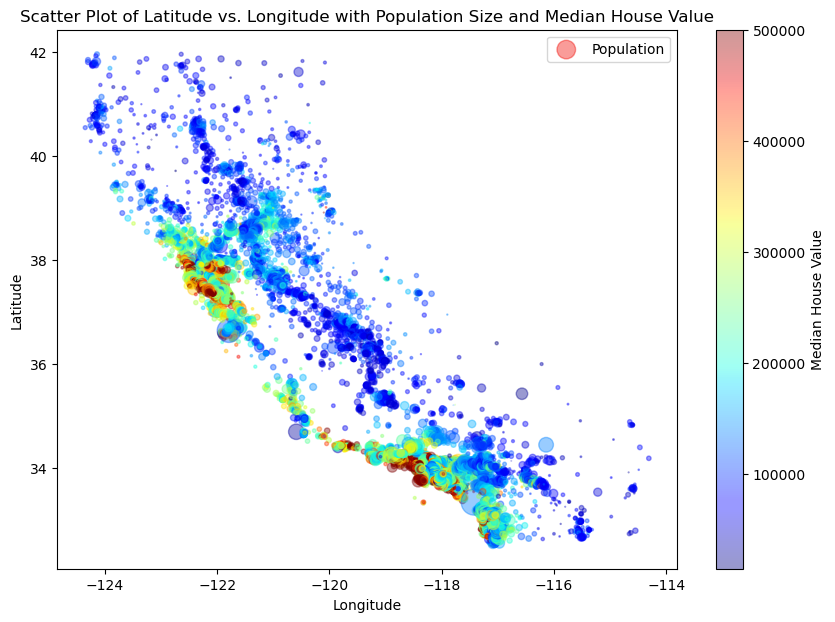

In [20]:
# Visualize the geographical distribution of housing prices
plt.figure(figsize=(10, 7))
plt.scatter(x=housing["longitude"], y=housing["latitude"], alpha=0.4, s=housing["population"]/100,
            c=housing["median_house_value"], cmap="jet")
plt.colorbar(label="Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter Plot of Latitude vs. Longitude with Population Size and Median House Value")
plt.legend(["Population"])
plt.show()


### Drop the column "ocean_proximity", then you only have numeric columns which will simplify your analysis. Remember, this is a POC!



In [21]:
# Drop the 'ocean_proximity' column
housing_new = housing.drop(['ocean_proximity'], axis=1)
housing_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [22]:
# Extract features (X) and target variable (y)
X = housing_new.drop("median_house_value", axis=1).values 
y = housing_new["median_house_value"].values


In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
print(X)

[[-1.2223e+02  3.7880e+01  4.1000e+01 ...  3.2200e+02  1.2600e+02
   8.3252e+00]
 [-1.2222e+02  3.7860e+01  2.1000e+01 ...  2.4010e+03  1.1380e+03
   8.3014e+00]
 [-1.2224e+02  3.7850e+01  5.2000e+01 ...  4.9600e+02  1.7700e+02
   7.2574e+00]
 ...
 [-1.2122e+02  3.9430e+01  1.7000e+01 ...  1.0070e+03  4.3300e+02
   1.7000e+00]
 [-1.2132e+02  3.9430e+01  1.8000e+01 ...  7.4100e+02  3.4900e+02
   1.8672e+00]
 [-1.2124e+02  3.9370e+01  1.6000e+01 ...  1.3870e+03  5.3000e+02
   2.3886e+00]]


In [28]:
print(y)

[452600. 358500. 352100. ...  92300.  84700.  89400.]


### You have missing values in your data. Handle this with [ SimpleImputer(strategy="median") ], check the fantastic Scikit-learn documentation for details.

In [30]:
# Instantiate SimpleImputer with median strategy
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train)

# Fit and transform on train set
X_train_imputed = imputer.transform(X_train)

# Transform test set
X_test_imputed = imputer.transform(X_test)

In [31]:
# Instantiate SimpleImputer with median strategy
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train)

SimpleImputer(strategy='median')

### Create one "Linear Regression" model and one "Lasso" model. For the Lasso model, use GridSearchCV to optimize  𝛼
  values, choose yourself which  𝛼
  values to evaluate. Use RMSE as a metric to decide which model to choose

In [12]:
# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train_imputed, y_train)

LinearRegression()

In [32]:
# Impute missing values in the training and testing sets
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [13]:
# Lasso Model with GridSearchCV for hyperparameter tuning
lasso = Lasso()
hyper_param_lasso = {'alpha': (1, 10, 41, 50, 70)}
lasso_grid = GridSearchCV(lasso, hyper_param_lasso, cv = 5)
 
# Fit the GridSearch to use the best hyperparameter in our cross validation
lasso_grid.fit(X_train_imputed, y_train)
 
# print(lasso_grid.best_params_)
 
# Get the best Alpha
best_alpha = lasso_grid.best_params_['alpha']

In [14]:
lasso = Lasso()
hyper_param_lasso = {'alpha':(1, 10, 41, 50, 70)}
lasso_reg = GridSearchCV(lasso, hyper_param_lasso, cv = 5)
# Fit the gridsearch to use the best hyperparameter in our cross validation
lasso_reg.fit(X_train, y_train)

print(lasso_reg.best_params_)

{'alpha': 41}


In [15]:
# Models Predictions
lin_reg_preds = lin_reg.predict(X_test_imputed)
lasso_preds = lasso_reg.predict(X_test_imputed)

# Calculate RMSE
lin_reg_rmse = mean_squared_error(y_test, lin_reg_preds, squared=False)
lasso_rmse = mean_squared_error(y_test, lasso_preds, squared=False)

# Print the results
print("Linear Regression RMSE:", lin_reg_rmse)
print()
print("Lasso RMSE:", lasso_rmse)

Linear Regression RMSE: 71131.25918417308

Lasso RMSE: 71127.93360020408


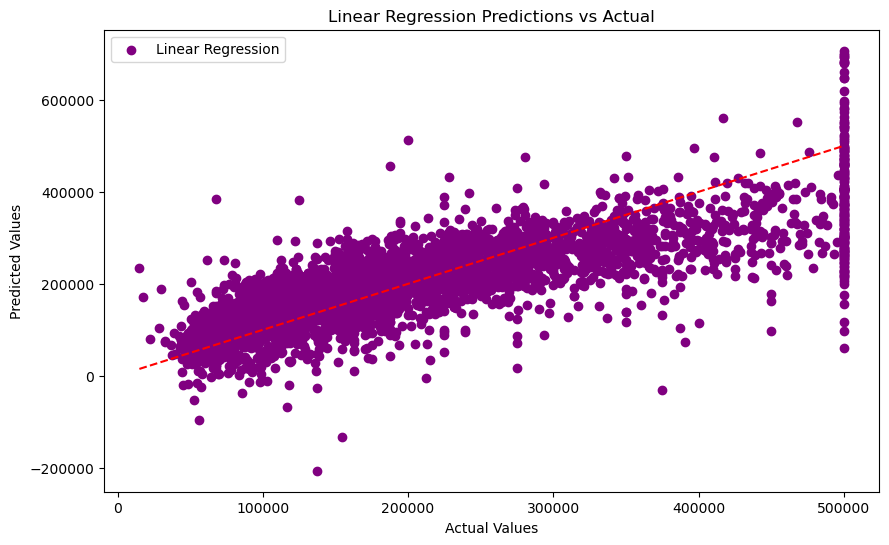

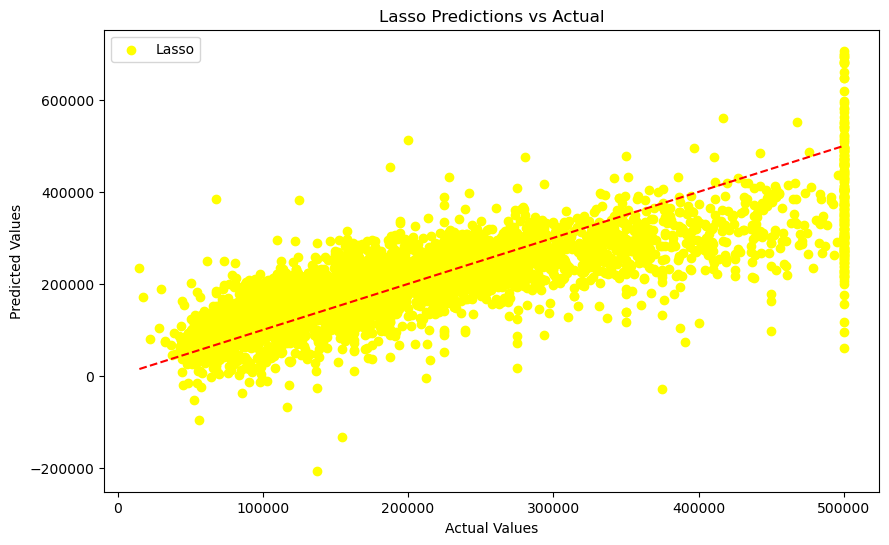

In [16]:
# Scatter plot for Linear Regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lin_reg_preds, color='purple', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Scatter plot for Lasso model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_preds, color='yellow', label='Lasso')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Lasso Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


### Presentation

 In this Proof of Concept (POC), our objective was to enhance the house pricing process through machine learning techniques. Here's a summary of our key findings and steps:

1. **Dataset Exploration and Preprocessing**:
   - We began by exploring the housing dataset, gaining insights into its structure and contents.
   - To simplify the analysis, we dropped the 'ocean_proximity' column, focusing solely on numeric features.

2. **Handling Missing Values**:
   - Recognizing the presence of missing values in the dataset, we employed the SimpleImputer with a strategy of 'median' to fill in these gaps. This ensured that our models could effectively utilize all available data.

3. **Model Development**:
   - We constructed two distinct models to predict house prices: Linear Regression and Lasso Regression.
   - Linear Regression provides a baseline approach, while Lasso Regression offers a more refined model by penalizing the complexity of the regression model through regularization.

4. **Hyperparameter Optimization**:
   - For the Lasso Regression model, we employed GridSearchCV to identify the optimal value for the regularization parameter (alpha).
   - By systematically evaluating various alpha values, we aimed to enhance the model's performance and generalization ability.

5. **Model Evaluation**:
   - To assess the effectiveness of our models, we employed Root Mean Squared Error (RMSE) as the evaluation metric.
   - RMSE provides a measure of the average deviation between predicted and actual house prices, offering valuable insights into the models' predictive accuracy.

6. **Results Visualization**:
   - We visualized the performance of our models through scatter plots, comparing the predicted house prices against the actual values.
   - These visualizations provide a clear understanding of how well our models are performing and highlight any potential areas for improvement.

In conclusion, our POC demonstrates the potential of machine learning in optimizing the house pricing process. By leveraging advanced modeling techniques and rigorous evaluation methods, we aim to enhance decision-making accuracy and efficiency in the real estate domain. Moving forward, further refinement and validation of our models will be essential to ensure their practical viability and effectiveness in real-world scenarios.

## Summary

- Lasso model slightly outperformed Linear Regression, with RMSE of 71127.93360020408.
- Further refinement is necessary to enhance model accuracy.
- Considering more advanced modeling techniques could be beneficial.

## Next step
The next step is to test the data using a model that focuses more on the details of the data and provides more accurate results to get the best results. This necessitates the use of more sophisticated modeling techniques that can capture complex relationships within the data, which can lead to better predictions.